In [1]:
import pandas as pd # Importing the pandas library for data manipulation and analysis
import numpy as np # Importing the numpy library for linear algebra operations
import matplotlib.pyplot as plt # Importing matplotlib.pyplot for data visualization
import seaborn as sns # Importing seaborn for enhanced data visualization, especially for heatmaps

from sklearn.model_selection import train_test_split # Importing train_test_split to split the dataset into training and testing sets
from sklearn import metrics # Importing metrics for performance evaluation of the model
from sklearn.metrics import confusion_matrix # Importing confusion_matrix to visualize the performance of the classification model

In [2]:
# load dataset
df = pd.read_csv('df_normalized.csv')


In [3]:
X_columns = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']

X = df[X_columns] # take columns we want for training
Y = df['Churn'] # take the value we want to predict

In [4]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,test_size=0.30,random_state=42)


In [5]:
# Print the shape of the training feature set
print("xTrain shape:", xTrain.shape)

# Print the shape of the test feature set
print("xTest shape:", xTest.shape)

# Print the shape of the training target set
print("yTrain shape:", yTrain.shape)

# Print the shape of the test target set
print("yTest shape:", yTest.shape)

xTrain shape: (353644, 9)
xTest shape: (151562, 9)
yTrain shape: (353644,)
yTest shape: (151562,)


In [6]:
# Import performance metrics

from sklearn.metrics import accuracy_score, classification_report

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
gb_class = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [9]:
# Train (fit) the Random Forest model on the training data

gb_class.fit(xTrain, yTrain)

GradientBoostingClassifier(random_state=42)

In [10]:
# Use the trained Random Forest model to predict the species on the test data

yHat = gb_class.predict(xTest)

In [11]:
# Evaluate model performance

accuracy = accuracy_score(yHat, yTest)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(yTest, yHat))


Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89     67461
           1       0.90      0.95      0.92     84101

    accuracy                           0.91    151562
   macro avg       0.91      0.91      0.91    151562
weighted avg       0.91      0.91      0.91    151562



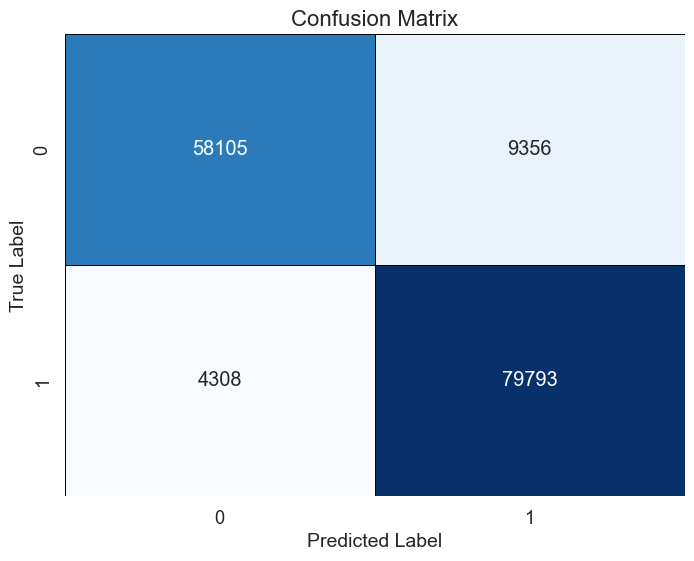

In [12]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix by evaluating yTest and yHat
cm = confusion_matrix(yTest, yHat)


# Set up the figure size and font scale for better readability
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)

# Create a sns.heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5, linecolor='black')

# Add labels and title to the heatmap
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)



# Show the plot
plt.show()

In [13]:
# Get feature importances from the Gradient Boosting model
gbc_feature_importances = gb_class.feature_importances_

# Pair feature names with their importances
gbc_importance_df = pd.DataFrame({
    'Feature': xTrain.columns,
    'Importance': gbc_feature_importances
}).sort_values(by='Importance', ascending=False)

print("Gradient Boosting Feature Importances:")
print(gbc_importance_df)

Gradient Boosting Feature Importances:
             Feature  Importance
4      Support Calls    0.473287
7        Total Spend    0.277873
0                Age    0.162762
6    Contract Length    0.047871
8   Last Interaction    0.022675
1             Gender    0.009481
2             Tenure    0.003799
3    Usage Frequency    0.001553
5  Subscription Type    0.000700
